In [2]:
import pandas as pd
import nltk

In [4]:
modi=pd.read_csv('narendramodi_tweets.csv')
modi.shape

(3220, 14)

In [5]:
modi.head()

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


In [9]:
modi.dtypes

id                      float64
retweets_count          float64
favorite_count          float64
created_at               object
text                     object
lang                     object
retweeted                  bool
followers_count         float64
friends_count           float64
hashtags_count          float64
description              object
location                 object
background_image_url     object
source                   object
dtype: object

In [80]:
modi['date']=pd.to_datetime(modi['created_at'],format='%Y-%m-%d %H:%M:%S')
modi["date"].head()

0   2017-01-31 11:00:07
1   2017-01-31 10:59:12
2   2017-01-31 10:52:33
3   2017-01-31 10:52:22
4   2017-01-31 10:52:16
Name: date, dtype: datetime64[ns]

In [81]:
modi['date'].min(), modi['date'].max()

(Timestamp('2016-03-09 12:22:10'), Timestamp('2017-01-31 11:00:07'))

In [82]:
modi.isnull().describe().T

,count,unique,top,freq
id,3220,1,False,3220
retweets_count,3220,1,False,3220
favorite_count,3220,1,False,3220
created_at,3220,1,False,3220
text,3220,1,False,3220
lang,3220,1,False,3220
retweeted,3220,1,False,3220
followers_count,3220,1,False,3220
friends_count,3220,1,False,3220
hashtags_count,3220,1,False,3220


In [83]:
!pip install wordcloud

In [5]:
!pip install nltk

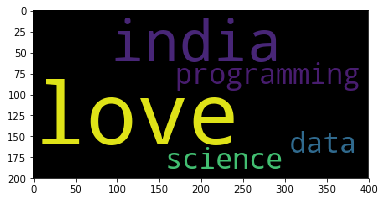

In [84]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc= WordCloud().generate('i love india. i love programming. i love data science')
plt.imshow(wc)

In [85]:
#concat the words
' '.join(['i','love','india'])

'i love india'

In [86]:
#' '.join(modi['text'])

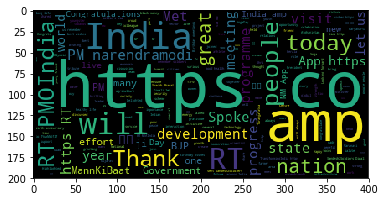

In [87]:
wc=WordCloud().generate(' '.join(modi['text']))
plt.imshow(wc)

## text transformations or text cleaning
- convert every charecer to lowercase
- remove special charecters ,numbers
- remove common stop words (of,was..),junk words (amp, rt,https...)
- identify root og the word(stemming)


In [88]:
docs=modi['text'].str.lower()
docs.head()

0    the president's address wonderfully encapsulat...
1    rashtrapati ji's address to both houses of par...
2    rt @pmoindia: empowering the marginalised. htt...
3    rt @pmoindia: commitment to welfare of farmers...
4    rt @pmoindia: improving the quality of life fo...
Name: text, dtype: object

In [89]:
#remove special chars

## regular expression

In [90]:
docs.str.replace('the','-').head() # replace the with -
docs.str.replace('rt','').head() # remove rt
docs.str.replace('[a-z]','').head()
docs.str.replace('[0-9]','').head() 

0    the president's address wonderfully encapsulat...
1    rashtrapati ji's address to both houses of par...
2    rt @pmoindia: empowering the marginalised. htt...
3    rt @pmoindia: commitment to welfare of farmers...
4    rt @pmoindia: improving the quality of life fo...
Name: text, dtype: object

In [91]:
docs.str.replace('[^a-z]','').head() # retain all alphabets

0    thepresidentsaddresswonderfullyencapsulatedind...
1    rashtrapatijisaddresstobothhousesofparliamentw...
2    rtpmoindiaempoweringthemarginalisedhttpstcowws...
3    rtpmoindiacommitmenttowelfareoffarmershttpstco...
4    rtpmoindiaimprovingthequalityoflifeforthepoorh...
Name: text, dtype: object

In [92]:
docs.str.replace('[^a-z ]','').head() # retain all alphabets with spaces

0    the presidents address wonderfully encapsulate...
1    rashtrapati jis address to both houses of parl...
2    rt pmoindia empowering the marginalised httpst...
3    rt pmoindia commitment to welfare of farmers h...
4    rt pmoindia improving the quality of life for ...
Name: text, dtype: object

In [93]:
docs=docs.str.replace('[^a-z #@]','') # retain all alphabets with #@
docs.head()

0    the presidents address wonderfully encapsulate...
1    rashtrapati jis address to both houses of parl...
2    rt @pmoindia empowering the marginalised https...
3    rt @pmoindia commitment to welfare of farmers ...
4    rt @pmoindia improving the quality of life for...
Name: text, dtype: object

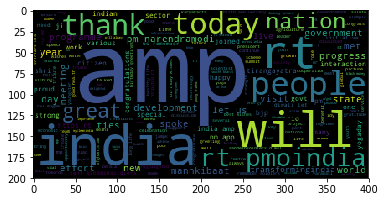

In [94]:
wc=WordCloud().generate(' '.join(docs))
plt.imshow(wc)

In [95]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\sreekar
[nltk_data]     chidurala\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [96]:
#nltk.corpus.stopwords.words('english')
stop_words=nltk.corpus.stopwords.words('english')
junk_words=["amp",'rt','https','will']
len(stop_words)
stop_words.extend(junk_words)
len(stop_words)

183

In [97]:
#stop_words

In [98]:
x=[1,2,3]
y=[5,6,7]
x.extend(y)
x

[1, 2, 3, 5, 6, 7]

In [99]:
stemmer=nltk.PorterStemmer()
stemmer.stem("playing")
stemmer.stem("fucked")
stemmer.stem("plays")
#stemmer.stem("president") #drawback

'play'

In [100]:
stemmer=nltk.PorterStemmer()
def clean_text(row_text):
    #print(type(row_text))
    row_words=row_text.split(' ')
    #print(row_words)
    row_words= [stemmer.stem(word) for word in row_words if word not in stop_words]
    #print(row_words)
    #print('----')
    return ' '.join(row_words)

docs_clean=docs.apply(lambda v: clean_text(v))

In [101]:
docs_clean.head()

0    presid address wonder encapsul india strength ...
1    rashtrapati ji address hous parliament indepth...
2          @pmoindia empow marginalis httpstcowwsqgwdk
3     @pmoindia commit welfar farmer httpstcopaafrfmrc
4    @pmoindia improv qualiti life poor httpstcougmvkz
Name: text, dtype: object

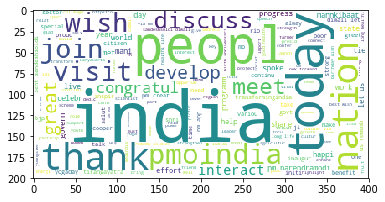

In [102]:
wc=WordCloud(background_color="white").generate(' '.join(docs_clean))
plt.imshow(wc)

# Hashtag Analysis

In [105]:
hashtags=[]

for row in docs_clean:
    row_words=row.split(' ')
    row_hashtags=[word for word in row_words if word.startswith('#')]
    hashtags.extend(row_hashtags)
hashtags[:10]

['#transformingindia',
 '#presidentmu',
 '#presidentmukherje',
 '#pr',
 '#presidentmukherje',
 '#presidentmukherje',
 '#presidentmukherje',
 '#',
 '#presidentmukherje',
 '#presidentmukherje']

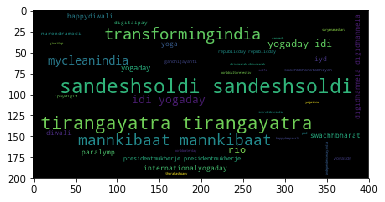

In [113]:
wc=WordCloud(background_color="black").generate(' '.join(hashtags))
plt.imshow(wc)

In [114]:
len(hashtags)

849

In [117]:
import numpy as np
len(np.unique(hashtags))

218

In [120]:
freq_hashtags=pd.Series(hashtags).value_counts()
freq_hashtags.head()

#sandeshsoldi         110
#mannkibaat            92
#tirangayatra          84
#yogaday               53
#transformingindia     52
dtype: int64

### Frequency of the hashtag #sandeshsoldi across months


In [121]:
modi['year_month']=modi['date'].dt.strftime('%Y-%m')
modi[['date','year_month']].head()

,date,year_month
0,2017-01-31 11:00:07,2017-01
1,2017-01-31 10:59:12,2017-01
2,2017-01-31 10:52:33,2017-01
3,2017-01-31 10:52:22,2017-01
4,2017-01-31 10:52:16,2017-01


In [127]:
modi['sandeshsoldi']=docs_clean.apply(lambda x: \
                                        1 if 'sandeshsoldi' in x else 0)
modi['sandeshsoldi'].value_counts()

0    3105
1     115
Name: sandeshsoldi, dtype: int64

In [128]:
modi.head()

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source,date,year_month,sandeshsoldi
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,2017-01-31 11:00:07,2017-01,0
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,2017-01-31 10:59:12,2017-01,0
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,2017-01-31 10:52:33,2017-01,0
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,2017-01-31 10:52:22,2017-01,0
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,2017-01-31 10:52:16,2017-01,0


Text(0,0.5,'frequency')

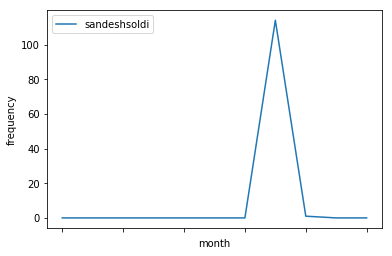

In [133]:
modi.groupby('year_month')[['sandeshsoldi']].sum().plot.line()
plt.xlabel('month')
plt.ylabel('frequency')

In [154]:
#for transformig india
modi['transformingindia']=docs_clean.apply(lambda x: \
                                        1 if 'transformingindia' in x else 0)
modi['transformingindia'].value_counts()

0    3151
1      69
Name: transformingindia, dtype: int64

Text(0,0.5,'frequency')

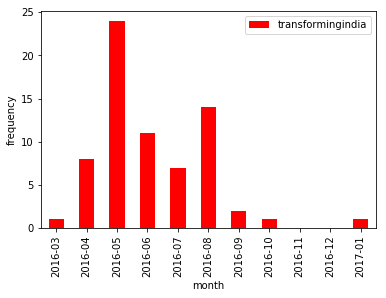

In [139]:
modi.groupby('year_month')[['transformingindia']].sum().plot.bar(color='red')
plt.xlabel('month')
plt.ylabel('frequency')

In [160]:
search_term='mannkibaat'
modi[search_term]=docs_clean.apply(lambda x: \
                                        1 if search_term in x else 0)
#modi['transformingindia'].value_counts()
#modi.groupby('year_month')[search_term].sum().plot.bar()
#plt.xlabel('month')
#plt.ylabel('frequency')

Text(0,0.5,'frequency')

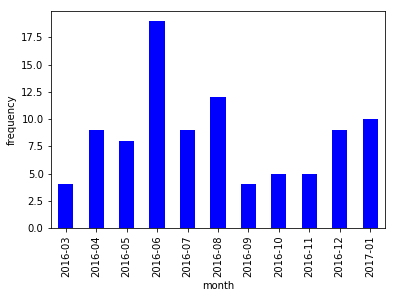

In [161]:
modi.groupby('year_month')[search_term].sum().plot.bar(color='blue')
plt.xlabel('month')
plt.ylabel('frequency')